In [1]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np

In [2]:
input_dir='/content/drive/MyDrive/Untitled_folder'

In [3]:
input_dir

'/content/drive/MyDrive/Untitled_folder'

In [4]:
a=['CAT','DOGS']

In [5]:
for category in a:
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path = os.path.join(input_dir,category,file)
    print(img_path)

/content/drive/MyDrive/Untitled_folder/CAT/cat.54.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.52.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.51.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.50.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.53.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.48.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.49.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.46.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.47.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.44.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.45.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.43.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.40.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.41.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.42.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.38.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.37.jpg
/content/drive/MyDrive/Untitled_folder/CAT/cat.36.jpg
/content/drive/MyDrive/Untit

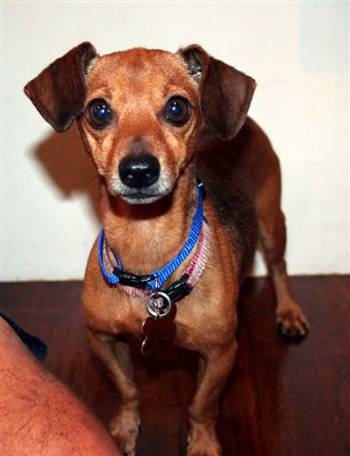

In [6]:
Image.open('/content/drive/MyDrive/Untitled_folder/DOGS/dog.392.jpg')

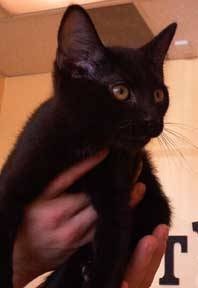

In [7]:
Image.open('/content/drive/MyDrive/Untitled_folder/CAT/cat.964.jpg')

In [8]:
img = imread(img_path)

In [9]:
img

array([[[102, 155, 195],
        [101, 154, 194],
        [ 99, 152, 192],
        ...,
        [ 59,  52,  44],
        [ 59,  52,  44],
        [ 59,  52,  44]],

       [[103, 156, 196],
        [103, 156, 196],
        [102, 155, 195],
        ...,
        [ 60,  53,  45],
        [ 60,  53,  45],
        [ 60,  53,  45]],

       [[104, 157, 197],
        [104, 157, 197],
        [105, 158, 198],
        ...,
        [ 62,  55,  47],
        [ 62,  55,  47],
        [ 62,  55,  47]],

       ...,

       [[173, 157, 158],
        [173, 157, 158],
        [173, 157, 157],
        ...,
        [169, 151, 137],
        [169, 151, 137],
        [170, 152, 138]],

       [[173, 157, 158],
        [173, 157, 158],
        [172, 156, 156],
        ...,
        [170, 152, 138],
        [172, 154, 140],
        [173, 155, 141]],

       [[175, 159, 160],
        [175, 159, 160],
        [173, 157, 158],
        ...,
        [169, 150, 136],
        [172, 153, 139],
        [175, 156, 142]]

In [10]:
img.shape

(431, 500, 3)

In [11]:
img = img.flatten()

In [12]:
img

array([102, 155, 195, ..., 175, 156, 142], dtype=uint8)

In [13]:
img.shape

(646500,)

In [17]:
datas=[]
labels=[]

In [18]:
for i,j in enumerate(a):
  for file in os.listdir(os.path.join(input_dir,j)):
    img_path = os.path.join(input_dir,j,file)
    img = imread(img_path)
    img = resize(img,(15,15))
    datas.append(img.flatten())
    labels.append(i)

In [20]:
datas=  np.asarray(datas)
labels= np.asarray(labels)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,r2_score
from sklearn.tree import DecisionTreeClassifier


In [25]:
x_train,x_test,y_train,y_test = train_test_split(datas,labels,test_size=0.2,random_state=30)

In [26]:
sc= StandardScaler()

In [27]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [28]:
x_train
x_test

array([[-1.63882209, -1.5899044 , -1.42883995, ..., -1.79604112,
        -1.77709456, -1.63188858],
       [ 0.2561287 ,  0.37220937,  0.50456745, ...,  0.26031089,
         0.29643415,  0.28612867],
       [-1.47104469, -1.4370005 , -1.27886493, ..., -1.49201326,
        -1.48170258, -1.36148889],
       ...,
       [ 1.75924742,  1.84141385,  1.68771174, ..., -0.3608616 ,
        -0.50057956, -0.51840103],
       [-0.26289981, -0.25307999, -0.05045288, ...,  0.24357462,
         0.33836558,  0.36679041],
       [ 1.76659871,  1.70943663,  1.51725694, ..., -0.24616533,
         0.05526476, -0.10273699]])

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [35]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred = model.predict(x_test)

In [37]:
accuracy = accuracy_score(y_pred,y_test)

In [38]:
print("THE ACCURACY IS:", accuracy)

THE ACCURACY IS: 0.5775


In [39]:
tree = DecisionTreeClassifier()

In [40]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred = tree.predict(x_test)

In [42]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.55

In [43]:
ctf = RandomForestClassifier()

In [44]:
ctf.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
y_pred = ctf.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)*100

In [48]:
accuracy

60.0

In [50]:
from sklearn.svm import SVC


In [51]:
svm_model = SVC(kernel='linear')

In [53]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [54]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)*100

In [55]:
accuracy

56.99999999999999

In [56]:
import pandas as pd
pd.DataFrame({"ACTUAL VALUE": y_test, "LOGISTIC REGRESSION": y_pred,"DECISION TREE":y_pred,"RandomFOrestClassifier":y_pred,"SVM":y_pred})

,ACTUAL VALUE,LOGISTIC REGRESSION,DECISION TREE,RandomFOrestClassifier,SVM
0,1,0,0,0,0
1,0,0,0,0,0
2,0,1,1,1,1
3,0,0,0,0,0
4,0,1,1,1,1
...,...,...,...,...,...
395,0,0,0,0,0
396,0,0,0,0,0
397,0,0,0,0,0
398,0,1,1,1,1


from matplotlib import pyplot as plt
_df_0['ACTUAL VALUE'].plot(kind='hist', bins=20, title='ACTUAL VALUE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['LOGISTIC REGRESSION'].plot(kind='hist', bins=20, title='LOGISTIC REGRESSION')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['DECISION TREE'].plot(kind='hist', bins=20, title='DECISION TREE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['RandomFOrestClassifier'].plot(kind='hist', bins=20, title='RandomFOrestClassifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ACTUAL VALUE', y='LOGISTIC REGRESSION', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='LOGISTIC REGRESSION', y='DECISION TREE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='DECISION TREE', y='RandomFOrestClassifier', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='RandomFOrestClassifier', y='SVM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['ACTUAL VALUE'].plot(kind='line', figsize=(8, 4), title='ACTUAL VALUE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['LOGISTIC REGRESSION'].plot(kind='line', figsize=(8, 4), title='LOGISTIC REGRESSION')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['DECISION TREE'].plot(kind='line', figsize=(8, 4), title='DECISION TREE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['RandomFOrestClassifier'].plot(kind='line', figsize=(8, 4), title='RandomFOrestClassifier')
plt.gca().spines[['top', 'right']].set_visible(False)